Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ling Lu"
COLLABORATORS = ""

---

# Homework 4 (Out of 21)

Submit your assignment as a Jupyter notebook file called `macid_a4.ipynb`, where `macid` is replaced with your MacID from your McMaster email address. (For example: since my McMaster email address is pocucan@mcmaster.ca, I would submit a file called `pocucan_a4.ipynb`.) Submit this file to the appropriate MacDrive link by Monday Nov 23rd


To complete your assignment, edit the function definitions in this template (then rename the file appropriately, as above). (Don't forget to use appropriate `return()` statements in your functions!) **Do not alter any other part of this template.**

While developing and testing your code, it might be helpful to use
`print` statements, but please remove them before submitting your solution. The template contains several `assert` statements that when executed will test your code.

Any file submitted for grading that does not conform to the specifications above will lead to a grade of zero on the assignment.

Before submitting your solution, you should make sure that it runs properly. To do this, you can open it in the Jupyter notebook server that comes installed with Anaconda, or you can use the McMaster Jupyter server, by going to the website https://mcmaster.syzygy.ca/. (Try running `Kernel > Restart & Run all` from the menu to run all of your code from scratch and make sure nothing is left out.) Feel free to use the Spyder IDE, or some other IDE, to develop your code before entering it into the Jupyter notebook that you submit.

Your grade for each question will depend on whether or not your code correctly handles not just the test cases provided in the template, but other test cases that will be run on your solutions.

Do not leave this assignment until the last minute; last-minute computer/internet issues on your part are your problem, not ours ...

Late assignments will be penalized 25% per day.

All work submitted for grading must be your own. You may discuss homework problems and related material with other students, but you must not submit work copied from others or from the internet.  If you use any internet resources for help, you **must** list them as comments (##) in your answer. 

Do not copy code from any other students, this is the fastest way for me to give you a 0. 

In [7]:
import numpy as np # import numpy module 
import matplotlib.pyplot as pyplot # import pyplot module 
from scipy import optimize as optimize # non linear function 
import numpy.random as random # import random number generator . 
import scipy.stats as stats # importing the stats submodule for some functions. 
import scipy.integrate as integrate

## Question 1: Bad Cop, No Donut



<img src="https://static.wikia.nocookie.net/thelegomovie/images/a/ac/BadCop.png/revision/latest?cb=20181206015640" width="400" height="400" />

You've been pulled over by a police officer on the 402 Highway. Your car was reading a speed of 114 km/h but the police officer says you were going 120. Your car is a Tesla Model S which records speed data for the day. You pull up your app and show the speed you were going when the cop clocked you with his speed measuring device. 


The cop insists that his device is accurate enough to catch you speeding. So he gives you the $125 ticket. You take him to public court over this. You find out that his speed measuring device has a measurement error of +-5 km/h 

Let's prove that his device isn't so accurate. 


### Question 1 Part 1 (2 points)

Assuming Gaussian distribution on the device error, use the `generate_speed_data` function to generate possible speed readings the device could have been measured for your situation. 

The function takes in nothing, and spits out an `np.array` of size `(n,)`. Let `n=4000`.

hint: You should probably use the random submodule. 

In [7]:
def generate_speed_data():
    random.seed(2)
    n = 4000
    # YOUR CODE HERE
    v=np.random.normal(114,5,size=(n,))
    return(v)

In [4]:
# visible test 
assert generate_speed_data().shape == (4000,)

In [5]:
## hidden tests, 
## check to make sure the generated data is appropriate. 


In [6]:
## hidden tests, 


### Question 1 Part 2 (2 points)

Using the `quantile` function in the `numpy` module, and the data from the previous question, determine the probability that the cop would measure you speeding. For your particular situation, speeding would be 120km/hr or greater. Please put your answer as a `float` number in the function `prob_speeding`. Probability is a number between 0 or 1. 

In [8]:
def prob_speeding(): 
    """ place the probability speeding. """
    answer =0.0
    # YOUR CODE HERE
    v=generate_speed_data()
    for i in range (0,101):
        if 120<=np.quantile(v,i/100):
            answer=(1-i/100)
            return(answer)

prob_speeding()

0.10999999999999999

In [8]:
## visible test check 0 points. 
your_prob = prob_speeding()

assert type(your_prob) == float 
assert 0 <= your_prob <= 1  

In [9]:
### hidden tests 

## Question 2: Bomb Time Prediction (4 points)


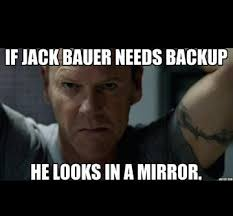


You are a CTU Agent Jack Bauer, you come across some intel that a terrorist set up a bomb 43 months ago in the middle of a road. It is set to go off today at 3pm. However you look at the time it is currently 2:00pm. If you called in bomb-squad now, it would take 50 minutes for them to get there. Assume that the bomb-squad disarms the bomb within 5 minutes of reaching the location.

The watch used for the timing mechanism of the device is a CASIO F91-W. Assume the measurement error is Gaussian in nature. You will need to do some research online to figure out what the standard deviation of the timing error is for this particular watch brand. 

PS: If you haven't watched the show "24", please go watch the first episode if you have time, it is so ridiculous the situations that come about.

What is the probability that the bomb will explode before the bomb-squad gets there?

Your choices are: 

A: 5% 

B: 1% 

C: 10% 

D: <1%

Please write your answer in the function `before_squad` as a string. 



In [10]:
def before_squad():
    answer = "D"
    # YOUR CODE HERE
    
    return(answer)
    

In [11]:
# visible tests 
your_prob = before_squad()
assert type(your_prob) == str

# hidden tests 


What is the probability that the bomb will explode during the defusing of the device?

Your choices are: 

A: 6.5 %

B: 4.5 %

C: 7.2 %

D: 5.1 %

Use the function `during_squad` and place your answer as a string. 

In [12]:
def during_squad():
    answer =  "A"
    # YOUR CODE HERE
    
    return(answer)

In [13]:
# visible test
assert type(during_squad()) == str
# hidden tests 


## Question 3: Differential Equation Model Fitting (2 points)

Looking at the following dataset: 


<img src="https://ms.mcmaster.ca/~pocucan/some_data
" width="400" height="400" />


The x-axis is $t$, the y-axis is $y$.

Which differential equation would model this data the best?

A: $\frac{\partial y}{ \partial t} = \beta sin(t) $

B: $\frac{\partial y}{ \partial t} = \beta cos(t) $

C: $\frac{\partial y}{ \partial t} = \beta cos(t) + 1 $

D: $\frac{\partial y}{ \partial t} = \beta sin(t) + 0.2 $

Use the `which_model` function definition to answer the question, return the answer as a string type

In [14]:
def which_model():
    
    answer = "B"
    # YOUR CODE HERE
    
    return(answer)

In [15]:
# visible tests 
your_answer = which_model()
assert type(your_answer) == str
# invisible tests 


## Question 3 Part 2:  Coefficient Fitting (4 points)

Given the following dataset: 

t = np.array([0.02898268, 0.05238042, 0.27095754, 0.29074201, 0.32255635,
       0.35911651, 0.4636914 , 0.60577309, 0.82756602, 0.85407685,
       0.90926909, 0.99562962, 1.11866281, 1.22029628, 1.25023908,
       1.37951219, 1.3917662 , 1.70318754, 1.90184329, 1.98798469,
       2.01999713, 2.06872667, 2.16774733, 2.52214379, 2.71491843,
       2.78814761, 2.95614665, 2.95682669, 3.26451761, 3.58074809,
       3.63487445, 3.64817505, 3.66838719, 4.04461847, 4.05475601,
       4.19024657, 4.20048079, 4.28158662, 4.45660675, 4.63914783,
       5.09852661, 5.11026401, 5.15725888, 5.29211596, 5.37274435,
       5.47425864, 5.55277478, 5.58765069, 5.78755007, 5.89111624])
       
 
y = np.array([-0.39639144 -0.32400268 -0.27186431 -0.25562032 -0.16225675 -0.15189875
 -0.11074858 -0.05655599  0.04667011  0.07349647  0.12134261  0.14489261
  0.26638036  0.2880655   0.54772415  0.82618039  0.87950423  0.94528821
  1.16324656  1.20999071  1.21907119  1.2558439   1.29965583  1.36286691
  1.4337609   1.45435494  1.45834378  1.45995335  1.46144188  1.46084769
  1.45720345  1.45546776  1.45130138  1.4488481   1.43724387  1.43141401
  1.42564735  1.4096291   1.39342074  1.39234778  1.39108271  1.3815082
  1.37663599  1.36745763  1.36627171  1.36604462  1.36983414  1.37362336
  1.3776294   1.38801987])
  
  and the following model: 
  
  $$ \frac{\partial y}{\partial t} = -\alpha sin(t) + \beta $$
  
  
 Estimate the coefficients $\beta$ and $\alpha$, and declare them correctly within the `find_model_coefficients` function. 

In [16]:

def find_model_coefficients():

    beta = 0.0 
    alpha = 0.0 
    
    # YOUR CODE HERE
    
    alpha=-0.54811132
    beta=0.28133012
    
    return(float(beta),float(alpha))

In [8]:
y = np.array([-0.39639144,-0.32400268, -0.27186431, -0.25562032, -0.16225675, -0.15189875, -0.11074858, -0.05655599, 0.04667011, 0.07349647, 0.12134261, 0.14489261, 0.26638036, 0.2880655, 0.54772415, 0.82618039, 0.87950423, 0.94528821, 1.16324656,1.20999071, 1.21907119, 1.2558439, 1.29965583, 1.36286691, 1.4337609, 1.45435494, 1.45834378, 1.45995335, 1.46144188, 1.46084769, 1.45720345, 1.45546776, 1.45130138, 1.4488481 ,1.43724387, 1.43141401, 1.42564735, 1.4096291, 1.39342074, 1.39234778, 1.39108271 ,1.3815082, 1.37663599 ,1.36745763, 1.36627171, 1.36604462, 1.36983414, 1.37362336 ,1.3776294, 1.38801987])

t = np.array([0.02898268, 0.05238042, 0.27095754, 0.29074201, 0.32255635, 0.35911651, 0.4636914 , 0.60577309, 0.82756602, 0.85407685, 0.90926909, 0.99562962, 1.11866281, 1.22029628, 1.25023908, 1.37951219, 1.3917662 , 1.70318754, 1.90184329, 1.98798469, 2.01999713, 2.06872667, 2.16774733, 2.52214379, 2.71491843, 2.78814761, 2.95614665, 2.95682669, 3.26451761, 3.58074809, 3.63487445, 3.64817505, 3.66838719, 4.04461847, 4.05475601, 4.19024657, 4.20048079, 4.28158662, 4.45660675, 4.63914783, 5.09852661, 5.11026401, 5.15725888, 5.29211596, 5.37274435, 5.47425864, 5.55277478, 5.58765069, 5.78755007, 5.89111624])



beta = 0.0 
alpha = 0.0 

def h(theta):
  alpha,beta=theta
  sse=0.0
  def dy_dt(y,t):
    return(-alpha*np.sin(t)+beta)
  t_hat=np.linspace(t[0],6,500)
  y_hat=integrate.odeint(dy_dt,-0.39639144,t_hat)
  for i in range(0,len(y)):
    idx=np.abs(t[i]-t_hat).argmin()
    sse+=((y[i]-y_hat[idx])**2)
  return (sse)
result=optimize.minimize(h,[1,1])

print(result)


      fun: 1.2973645913356537
 hess_inv: array([[3.09352428e-06, 9.57606381e-06],
       [9.57606381e-06, 2.96430236e-05]])
      jac: array([-4.34219837e-05, -3.79234552e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 151
      nit: 8
     njev: 49
   status: 2
  success: False
        x: array([-0.54811302,  0.2813301 ])


In [18]:
# visible tests 
your_coefs = find_model_coefficients()
assert type(your_coefs) == tuple
assert type(your_coefs[0]) == float

assert type(your_coefs[1]) == float

In [19]:
# hidden tests... 

## Question 4: Mixture Distributions (7 points)

The following dataset found at: 

https://ms.mcmaster.ca/pocucan/data.txt

Look up how to read in data in numpy from a txt file, there is a specific function which makes it super convenient. 


Assumes there exists two different Gaussian distributions, and you sample from one 50% of the time, and the other one the remaining 50% of the time. Each Gaussian distribution has the same variance, but different means. Here is the following objective function otherwise known as the log-liklihood for this model: 


$$ l(\tau_1,\tau_2,\mu_1,\mu_2) = \sum_{i=1}^n \log \left(\sum_{g=1}^2 \tau_g f(x_i, \mu_g,1) \right) $$

Where $f$ is the density of the Gaussian distribution. Use non-linear optimization to estimate what $\tau_1,\tau_2,\mu_1,\mu_2$ are. 


##  Question 4 Part 1 

This non-linear optimization is too difficult to do directly, instead you should infer from the description what the values of $\tau_1$ and $\tau_2$ are.

Use the function definition `tau_coefs` and return a tuple of two floats. 


In [20]:
def tau_coefs():
    
    tau_1 = 0.5
    tau_2 = 0.5
    
    # YOUR CODE HERE
    
    return(tau_1,tau_2)


In [21]:
# visible tests 
assert type(tau_coefs()) == tuple 
assert type(tau_coefs()[0]) == float 
assert type(tau_coefs()[1]) == float  


## Question 4 Part 2 

Use non-linear optimization to estimate the values of $\mu_1$ and $\mu_2$. 

Use the function definition `mu_coefs` and return a tuple of two floats. 


Hint: You should probably use the scipy.stats submodule for calculating the density of a normal distribution. 



In [22]:
def mu_coefs():
    
    mu_1 = 5.64327013
    mu_2 = 5.64327015
    
    # YOUR CODE HERE
    
    return(mu_1,mu_2)

In [9]:

def h2(theta):
    mu1=theta[0]
    mu2=theta[1]
    loglik=0.0
    x=np.loadtxt("https://ms.mcmaster.ca/pocucan/data.txt")
    for i in range (0,len(x)):
        loglik+=np.log(0.5*stats.norm.pdf(x[i],mu1,1))+np.log(0.5*stats.norm.pdf(x[i],mu2,1))
        return (-loglik)
result=optimize.minimize(h2,[6,9.2])
print(result)


      fun: 3.224171427529236
 hess_inv: array([[1.00000000e+00, 2.10164468e-09],
       [2.10164466e-09, 1.00000001e+00]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([5.64327018, 5.64327015])


In [24]:
# visible tests 
assert type(mu_coefs()) == tuple 
assert type(mu_coefs()[0]) == float 
assert type(mu_coefs()[1]) == float  

# hidden tests 


# THIS IS THE END OF THE ASSIGNMENT, PLEASE SUBMIT TO THIS MACDRIVE LINK WITH THIS ASSIGNMENT RENAMED ACCORDING TO YOUR MACID  DONT FORGET TO REMOVE NOT IMPLEMENTED ERROR LINES


<img src="https://i.4pcdn.org/s4s/1546837455034.jpg
" width="400" height="400" />

# The dapper duck of success wishes you good luck on your submission.

https://macdrive.mcmaster.ca/u/d/818705de222f47838a63/
